# Project 2 report

*You can delete this cell, and add new cells to put your code and write your report.*

*To add a new code or Markdown cell, click the <kbd>+</kbd> button in the toolbar. By default, this will be a code cell; to change it to Markdown, click the drop-down menu in the toolbar which says <kbd>Code</kbd>, and select <kbd>Markdown</kbd> in the list.*

*To format the text in a Markdown cell, just run the cell. To edit it again, double-click on it. For examples of Markdown formatting, you can double-click on any Markdown cell in any of the course notebooks. For instance, there are lots of examples at the top of the Week 1 tutorial notebook.*

# Air Pollution
Pollution can be gas or liquid or solid. It can also be classified chemically, such as:- oxide, hydrocarbon, acid or other kinds. Pollution can also be classified by what makes it.

Many pollutants go into the air from natural sources. These pollutants include dust, sea salt, volcanic ashes and gases, smoke from forest fires, pollen, and many other materials.[1] In fact, there are many more natural pollutants than pollutants that humans make.[1] However, humans and other living things have adapted to most of these natural pollutants.[1]source https://simple.wikipedia.org/wiki/Air_pollution


# About the notebook


Here, we will be analyzing OpenAQ dataset  using py-openaw, which has some information about the air pollutants. 

**Measurement units**
      -- a.  ug/m3 : micro gram/cubic meter
      -- b.  ppm : Parts Per Million

**Pollutants**
    a. O3 : Ozone gas
    b. SO2 : Sulphur Dioxed
    c. NO2 : Nitrogen Dioxed
    d. PM2.5 : Particles with an aerodynamic diameter less than  2.5μm 
    e. PM10 : Particles with an aerodynamic diameter less than  10μm 
    f. CO : Carbon monoxide

So, let's dive in immediately and find out the results!

# Data Visalization, Exploration and Analysis with py-openaq

## Importing the liabraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import openaq
import warnings

warnings.simplefilter('ignore')

%matplotlib inline

# Set major seaborn asthetics
sns.set("notebook", style='ticks', font_scale=1.0)

# Increase the quality of inline plots
mpl.rcParams['figure.dpi']= 500

print ("pandas v{}".format(pd.__version__))
print ("matplotlib v{}".format(mpl.__version__))
print ("seaborn v{}".format(sns.__version__))
print ("openaq v{}".format(openaq.__version__))

pandas v1.1.3
matplotlib v3.2.0
seaborn v0.11.0
openaq v1.1.0


In [3]:
api = openaq.OpenAQ()

## Fetching Cities using py-openaq

In [4]:
resp = api.cities(df=True, limit=10000)
resp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    2915 non-null   object 
 1   name       2915 non-null   object 
 2   city       2915 non-null   object 
 3   count      2915 non-null   float64
 4   locations  2915 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 114.0+ KB


In [5]:
# display the first 10 rows
print (resp.head(10))

  country       name       city       count  locations
0      US        007        007      1372.0          5
1      US        019        019       704.0          1
2      US        037        037      2683.0         23
3      US        039        039       380.0          1
4      US        047        047       101.0          1
5      US        051        051       330.0          7
6      US        077        077    670334.0          1
7      CH     Aargau     Aargau      4054.0          1
8      MX    Abasolo    Abasolo  32422943.0          2
9      US  ABBEVILLE  ABBEVILLE      4619.0          1


In [7]:
# Finding out which cities are in india
print (resp.query("country == 'IN'"))

     country           name           city       count  locations
24        IN       Agartala       Agartala  24547260.0          1
25        IN           Agra           Agra  21512785.0          1
28        IN      Ahmedabad      Ahmedabad  44994565.0          3
37        IN         Aizawl         Aizawl  26446446.0          1
38        IN          Ajmer          Ajmer  47066892.0          4
...      ...            ...            ...         ...        ...
2309      IN     Vijayapura     Vijayapura  28918775.0          1
2310      IN     Vijayawada     Vijayawada    127094.0          3
2321      IN  Visakhapatnam  Visakhapatnam  69522354.0          9
2400      IN         Yadgir         Yadgir  28556056.0          1
2406      IN    Yamunanagar    Yamunanagar  24629895.0          1

[146 rows x 5 columns]


**we are going to focus on Delhi, India. Why? Well..because there are over 500,000 data points and my personal research is primarily in India. We will also take a look at some SO2 data from Hawai’i later on (another great research locale).**

## Fetching locations using py-openaq

In [8]:
res = api.locations(df=True)
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id                     100 non-null    int64              
 1   country                100 non-null    object             
 2   city                   100 non-null    object             
 3   cities                 100 non-null    object             
 4   location               100 non-null    object             
 5   locations              100 non-null    object             
 6   sourceName             100 non-null    object             
 7   sourceNames            100 non-null    object             
 8   sourceType             100 non-null    object             
 9   sourceTypes            100 non-null    object             
 10  firstUpdated           100 non-null    datetime64[ns, UTC]
 11  lastUpdated            100 non-null    datetime64[ns, UTC]


In [9]:
# Grabbing the locations in delhi
res = api.locations(city='Delhi', df=True)
res.describe()

id          count  coordinates.latitude  coordinates.longitude
count    100.0000     100.000000             72.000000              72.000000
mean    5954.1100  210203.110000             28.637994              77.180298
std     2386.2901  242975.162507              0.078374               0.109994
min       13.0000      12.000000             28.470691              76.709395
25%     5578.2500    1640.750000             28.577967              77.127594
50%     5652.0000   48505.500000             28.638457              77.195328
75%     6929.5000  456797.500000             28.681405              77.252583
max    11607.0000  778735.000000             28.844687              77.316032

In [10]:
res.head(3)

id country   city   cities                             location  \
0  6359      IN  Delhi  [Delhi]  IHBAS, Dilshad Garden, Delhi - CPCB   
1  8235      IN  Delhi  [Delhi]           Jahangirpuri, Delhi - DPCC   
2  5586      IN  Delhi  [Delhi]               Sirifort, Delhi - CPCB   

                                           locations sourceName  \
0  [IHBAS, Dilshad Garden, Delhi - CPCB, IHBAS, D...      caaqm   
1                       [Jahangirpuri, Delhi - DPCC]      caaqm   
2  [Sirifort, Delhi - CPCB, Sirifort, New Delhi -...      caaqm   

            sourceNames  sourceType   sourceTypes              firstUpdated  \
0               [caaqm]  government  [government] 2018-04-28 15:45:00+00:00   
1               [caaqm]  government  [government] 2018-08-10 07:00:00+00:00   
2  [caaqm, data.gov.in]  government  [government] 2018-03-09 05:30:00+00:00   

                lastUpdated                      parameters  \
0 2021-12-05 00:00:00+00:00  [pm25, o3, so2, co, no2, pm10]   
1 2021-12-05 00:00:00+00:00  [pm25, so2, pm10, no2, o3, co]   
2 2021-12-04 23:45:00+00:00  [co, so2, pm10, pm25, o3, no2]   

                                 countsByMeasurement   count  \
0  [{'parameter': 'pm25', 'count': 125151}, {'par...  554910   
1  [{'parameter': 'pm25', 'count': 66141}, {'para...  399397   
2  [{'parameter': 'co', 'count': 110011}, {'param...  637122   

   coordinates.latitude  coordinates.longitude  
0             28.681174              77.302523  
1             28.732820              77.170633  
2             28.550425              77.215938

In [9]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id                     100 non-null    int64              
 1   country                100 non-null    object             
 2   city                   100 non-null    object             
 3   cities                 100 non-null    object             
 4   location               100 non-null    object             
 5   locations              100 non-null    object             
 6   sourceName             100 non-null    object             
 7   sourceNames            100 non-null    object             
 8   sourceType             100 non-null    object             
 9   sourceTypes            100 non-null    object             
 10  firstUpdated           100 non-null    datetime64[ns, UTC]
 11  lastUpdated            100 non-null    datetime64[ns, UTC]


In [10]:
## figuring out which locations in Delhi have PM2.5 data?

In [12]:
res = api.locations(city='Delhi', parameter='pm25', df=True)
res.head(2)

id country   city   cities                             location  \
0  5630      IN  Delhi  [Delhi]               Shadipur, Delhi - CPCB   
1  6359      IN  Delhi  [Delhi]  IHBAS, Dilshad Garden, Delhi - CPCB   

                                           locations sourceName  \
0  [Shadipur, Delhi - CPCB, Shadipur, New Delhi -...      caaqm   
1  [IHBAS, Dilshad Garden, Delhi - CPCB, IHBAS, D...      caaqm   

            sourceNames  sourceType   sourceTypes              firstUpdated  \
0  [caaqm, data.gov.in]  government  [government] 2018-03-09 05:30:00+00:00   
1               [caaqm]  government  [government] 2018-04-28 15:45:00+00:00   

                lastUpdated                      parameters  \
0 2021-12-04 11:30:00+00:00  [pm25, so2, co, no2, pm10, o3]   
1 2021-12-04 11:30:00+00:00  [pm10, no2, pm25, co, so2, o3]   

                                 countsByMeasurement   count  \
0  [{'parameter': 'pm25', 'count': 132947}, {'par...  698173   
1  [{'parameter': 'pm10', 'count': 28854}, {'para...  554604   

   coordinates.latitude  coordinates.longitude  
0             28.651478              77.147311  
1             28.681174              77.302523

Grabing the latest data from a location or locations.
What was the most recent PM2.5 data in Delhi?

In [12]:
res = api.latest(city='Delhi', parameter='pm25', df=True)
res.head(3)

parameter   value                    unit  \
lastUpdated                                                           
2021-12-05 00:00:00+00:00      pm25  170.20  b'\xc2\xb5g/m\xc2\xb3'   
2021-12-05 00:00:00+00:00        o3    5.24  b'\xc2\xb5g/m\xc2\xb3'   
2021-12-05 00:00:00+00:00       so2    0.85  b'\xc2\xb5g/m\xc2\xb3'   

                          sourceName country   city  \
lastUpdated                                           
2021-12-05 00:00:00+00:00      caaqm      IN  Delhi   
2021-12-05 00:00:00+00:00      caaqm      IN  Delhi   
2021-12-05 00:00:00+00:00      caaqm      IN  Delhi   

                                                      location  \
lastUpdated                                                      
2021-12-05 00:00:00+00:00  IHBAS, Dilshad Garden, Delhi - CPCB   
2021-12-05 00:00:00+00:00  IHBAS, Dilshad Garden, Delhi - CPCB   
2021-12-05 00:00:00+00:00  IHBAS, Dilshad Garden, Delhi - CPCB   

                           averagingPeriod.value averagingPeriod.unit  
lastUpdated                                                            
2021-12-05 00:00:00+00:00                  900.0              seconds  
2021-12-05 00:00:00+00:00                  900.0              seconds  
2021-12-05 00:00:00+00:00                  900.0              seconds

## What about the most recent SO2 data in Hawii?

In [13]:
res = api.latest(city='Hilo', parameter='so2', df=True)
res

parameter  value                    unit sourceName  \
lastUpdated                                                                     
2021-12-04 23:00:00+00:00       so2  0.000                     ppm     AirNow   
2021-12-04 23:00:00+00:00       so2  0.001                     ppm     AirNow   
2021-11-30 07:00:00+00:00      pm25  3.000  b'\xc2\xb5g/m\xc2\xb3'     AirNow   
2021-12-04 23:00:00+00:00       so2  0.000                     ppm     AirNow   
2021-12-04 23:00:00+00:00      pm25  3.000  b'\xc2\xb5g/m\xc2\xb3'     AirNow   
2021-12-04 23:00:00+00:00      pm25  2.000  b'\xc2\xb5g/m\xc2\xb3'     AirNow   
2021-12-04 23:00:00+00:00       so2  0.003                     ppm     AirNow   
2021-12-04 23:00:00+00:00       so2  0.001                     ppm     AirNow   
2021-12-04 23:00:00+00:00      pm25  3.000  b'\xc2\xb5g/m\xc2\xb3'     AirNow   
2018-07-02 20:00:00+00:00       so2  0.178                     ppm     AirNow   
2018-06-21 23:00:00+00:00       so2  0.000                     ppm     AirNow   
2017-01-26 17:00:00+00:00       so2  0.002                     ppm     AirNow   

                          country  city             location  \
lastUpdated                                                    
2021-12-04 23:00:00+00:00      US  Hilo  Hawaii Volcanoes NP   
2021-12-04 23:00:00+00:00      US  Hilo               Pahala   
2021-11-30 07:00:00+00:00      US  Hilo               Pahala   
2021-12-04 23:00:00+00:00      US  Hilo                 Kona   
2021-12-04 23:00:00+00:00      US  Hilo                 Kona   
2021-12-04 23:00:00+00:00      US  Hilo                 Hilo   
2021-12-04 23:00:00+00:00      US  Hilo                 Hilo   
2021-12-04 23:00:00+00:00      US  Hilo           Ocean View   
2021-12-04 23:00:00+00:00      US  Hilo           Ocean View   
2018-07-02 20:00:00+00:00      US  Hilo  Hawaii Volcanoes NP   
2018-06-21 23:00:00+00:00      US  Hilo        Mountain View   
2017-01-26 17:00:00+00:00      US  Hilo       Puna E Station   

                           averagingPeriod.value averagingPeriod.unit  
lastUpdated                                                            
2021-12-04 23:00:00+00:00                   3600              seconds  
2021-12-04 23:00:00+00:00                   3600              seconds  
2021-11-30 07:00:00+00:00                   3600              seconds  
2021-12-04 23:00:00+00:00                   3600              seconds  
2021-12-04 23:00:00+00:00                   3600              seconds  
2021-12-04 23:00:00+00:00                   3600              seconds  
2021-12-04 23:00:00+00:00                   3600              seconds  
2021-12-04 23:00:00+00:00                   3600              seconds  
2021-12-04 23:00:00+00:00                   3600              seconds  
2018-07-02 20:00:00+00:00                   3600              seconds  
2018-06-21 23:00:00+00:00                   3600              seconds  
2017-01-26 17:00:00+00:00                   3600              seconds

Using Measurements we can grab all of the dataz, in a query on a whole bunch of parameters listed in the API docs

### Grabing the past 10000 data points for PM2.5 in Delhi

In [15]:
res = api.measurements(city='Delhi', parameter='pm25', limit=10000, df=True)

# Print out the statistics on a per-location basiss
res.groupby(['location'])['value'].describe()

count        mean  \
location                                                              
Alipur, Delhi - DPCC                              271.0  223.704797   
Anand Vihar, Delhi - DPCC                         294.0  267.938776   
Ashok Vihar, Delhi - DPCC                         267.0  245.168539   
Aya Nagar, Delhi - IMD                            158.0  148.028544   
Bawana, Delhi - DPCC                              290.0  243.144828   
Burari Crossing, Delhi - IMD                      264.0  160.264659   
CRRI Mathura Road, Delhi - IMD                    261.0  218.554368   
Chandni Chowk, Delhi - IITM                       265.0  170.521509   
DTU, Delhi - CPCB                                 307.0  238.041042   
Dr. Karni Singh Shooting Range, Delhi - DPCC      225.0  210.222222   
Dwarka-Sector 8, Delhi - DPCC                     290.0  231.003448   
IGI Airport (T3), Delhi - IMD                     162.0  144.805247   
IHBAS, Dilshad Garden, Delhi - CPCB               277.0  172.655596   
ITO, Delhi - CPCB                                 262.0  226.041985   
Jahangirpuri, Delhi - DPCC                        294.0  297.074830   
Jawaharlal Nehru Stadium, Delhi - DPCC            292.0  217.900685   
Lodhi Road, Delhi - IITM                          192.0  321.345312   
Lodhi Road, Delhi - IMD                           279.0  172.298638   
Major Dhyan Chand National Stadium, Delhi - DPCC  282.0  224.546099   
Mandir Marg, Delhi - DPCC                         270.0  205.114815   
Mundka, Delhi - DPCC                              301.0  264.016611   
NSIT Dwarka, Delhi - CPCB                         310.0  238.175484   
Najafgarh, Delhi - DPCC                           234.0  182.670940   
Narela, Delhi - DPCC                              142.0  265.739437   
Nehru Nagar, Delhi - DPCC                         147.0  263.639456   
North Campus, DU, Delhi - IMD                     241.0  212.096473   
Okhla Phase-2, Delhi - DPCC                       281.0  231.373665   
Patparganj, Delhi - DPCC                          288.0  245.836806   
Punjabi Bagh, Delhi - DPCC                        217.0  263.870968   
Pusa, Delhi - DPCC                                305.0  176.069344   
R K Puram, Delhi - DPCC                           276.0  242.746377   
Rohini, Delhi - DPCC                              291.0  270.371134   
Shadipur, Delhi - CPCB                            324.0  127.799691   
Sirifort, Delhi - CPCB                            325.0  196.784615   
Sonia Vihar, Delhi - DPCC                         268.0  241.615672   
Sri Aurobindo Marg, Delhi - DPCC                  292.0  177.520548   
Vivek Vihar, Delhi - DPCC                         248.0  252.193548   
Wazirpur, Delhi - DPCC                            308.0  263.659091   

                                                          std    min  \
location                                                               
Alipur, Delhi - DPCC                                69.820468  58.00   
Anand Vihar, Delhi - DPCC                           98.189635  59.00   
Ashok Vihar, Delhi - DPCC                           73.901769  61.00   
Aya Nagar, Delhi - IMD                              40.144404  34.19   
Bawana, Delhi - DPCC                                73.569493  57.00   
Burari Crossing, Delhi - IMD                        54.230884  36.14   
CRRI Mathura Road, Delhi - IMD                      67.842217  85.31   
Chandni Chowk, Delhi - IITM                         85.120096   0.00   
DTU, Delhi - CPCB                                  107.716758   0.00   
Dr. Karni Singh Shooting Range, Delhi - DPCC        78.429247  38.00   
Dwarka-Sector 8, Delhi - DPCC                       73.812561  46.00   
IGI Airport (T3), Delhi - IMD                       78.928879   0.00   
IHBAS, Dilshad Garden, Delhi - CPCB                 66.926243   0.00   
ITO, Delhi - CPCB                                   79.791984   0.00   
Jahangirpuri, Delhi - DPCC                          94.95

The above data represents raw data and clearly, we should be doing some serious data cleaning. We need to go ahead and plot all of these locations on a figure.

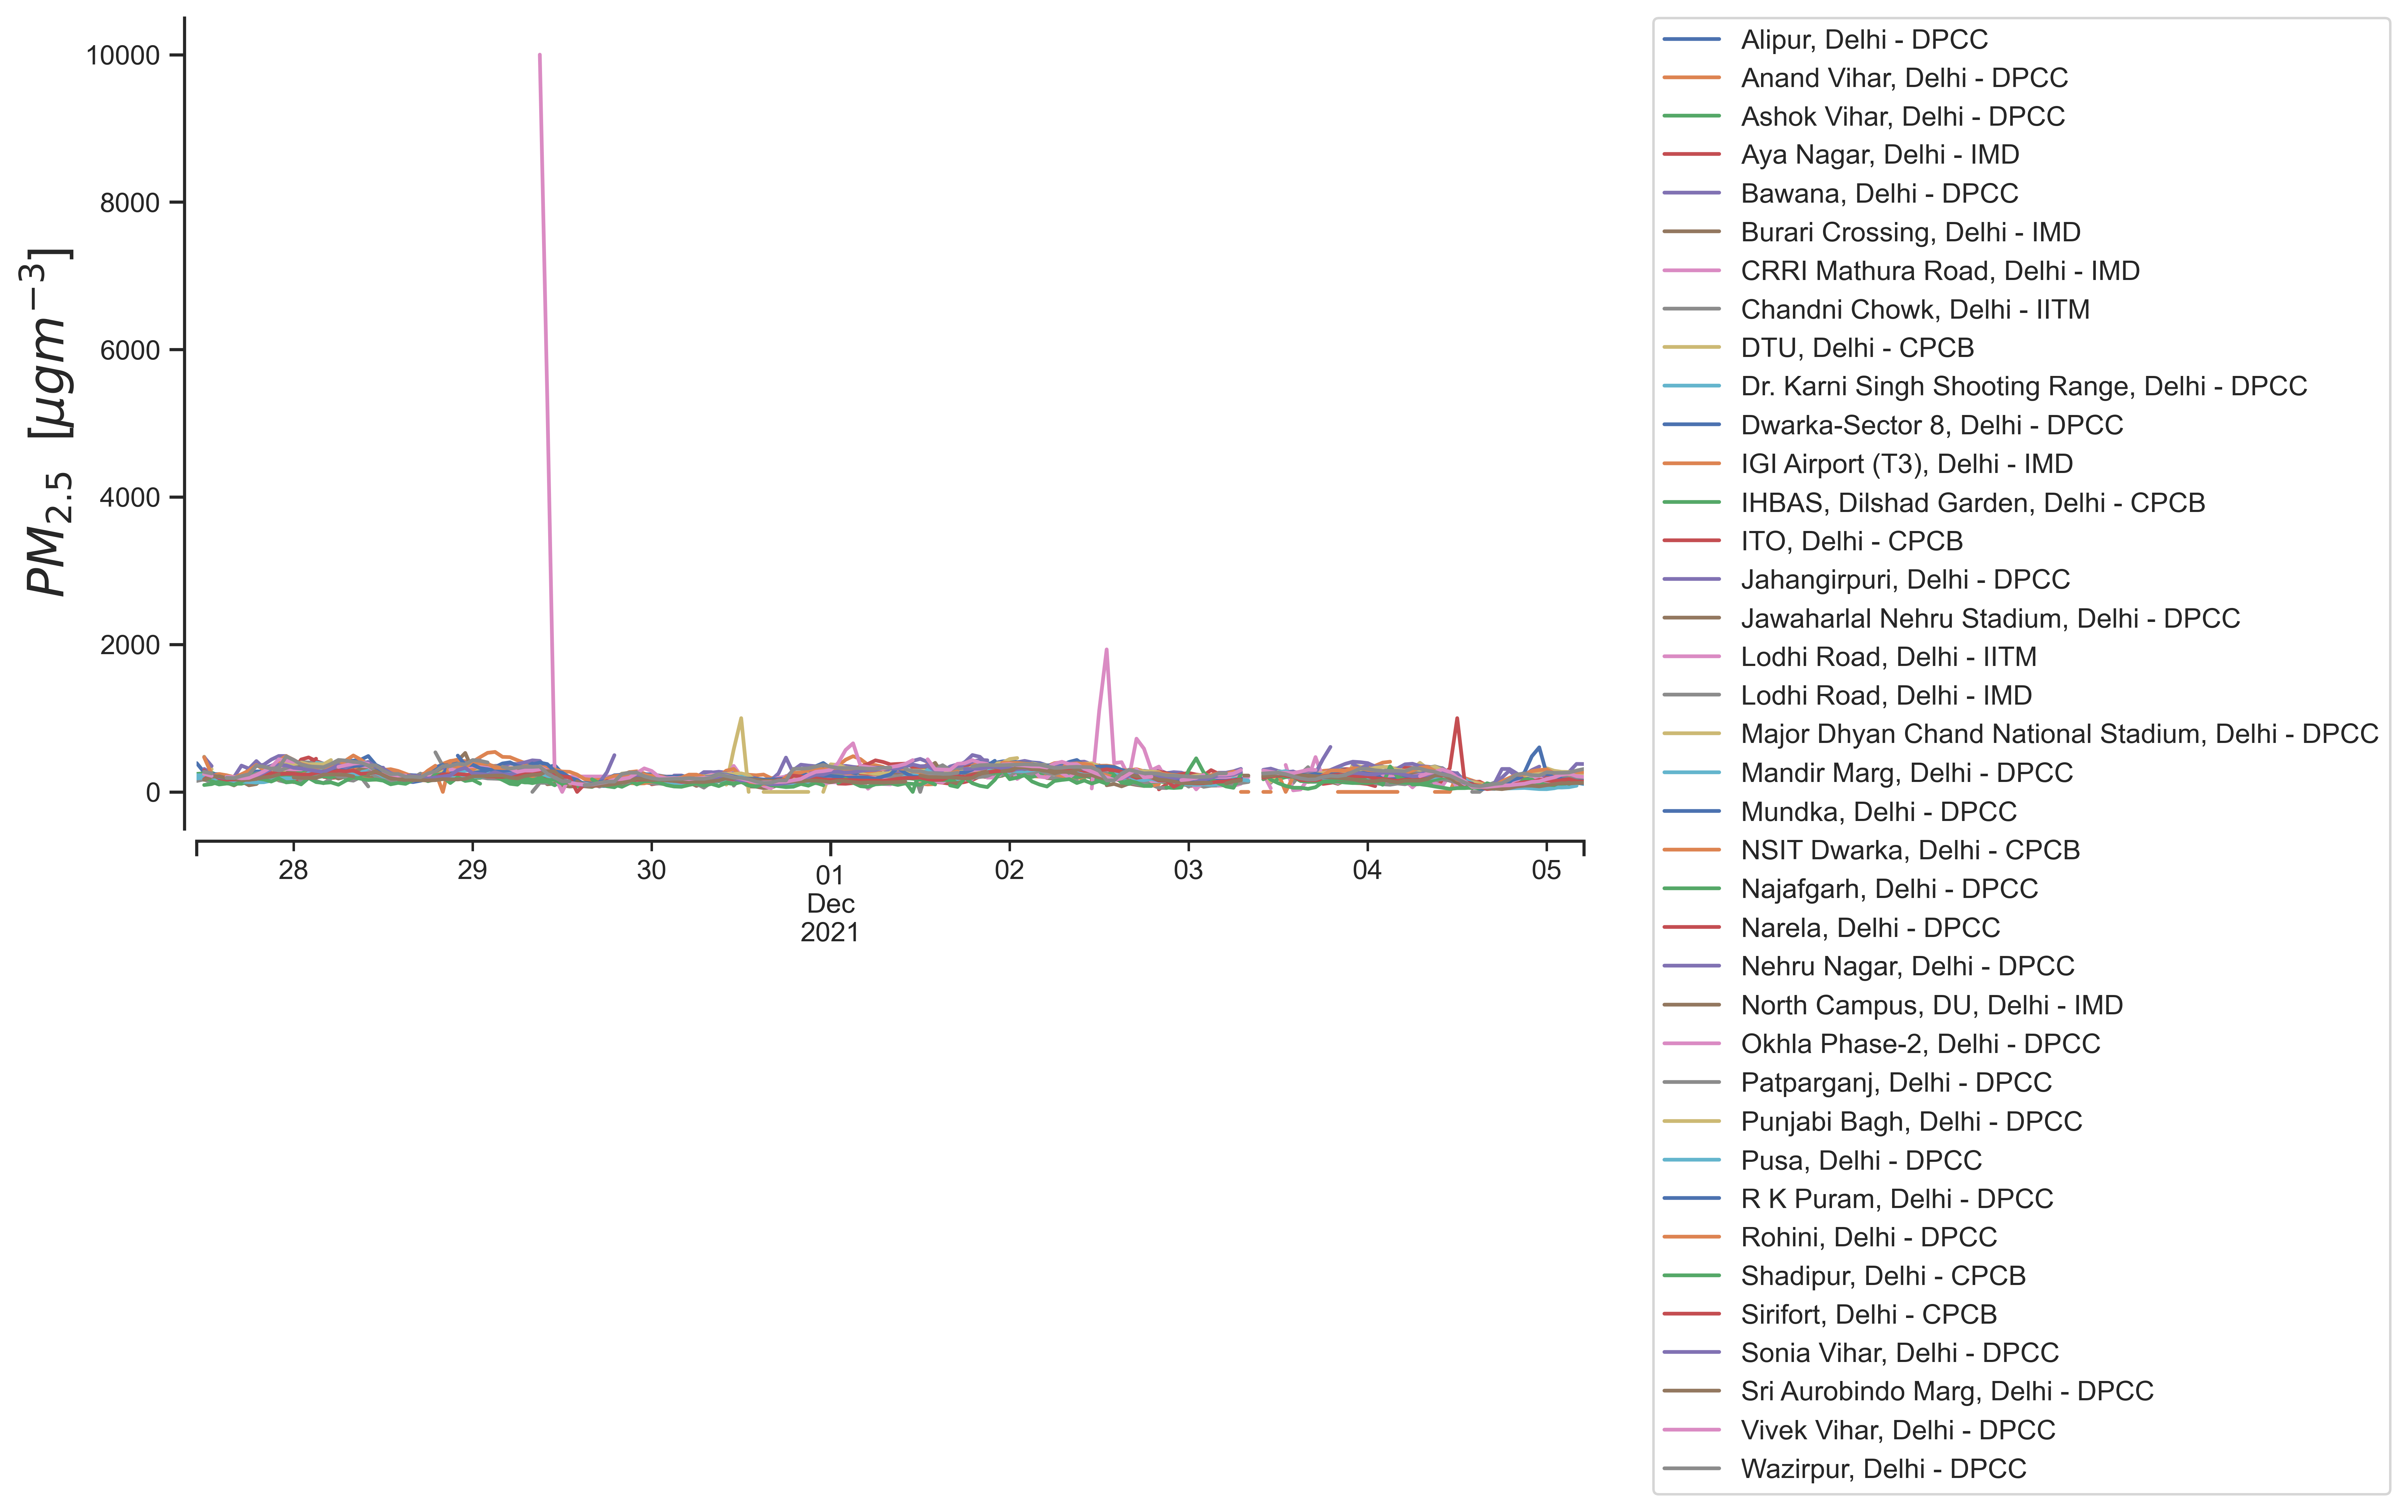

In [16]:
fig, ax = plt.subplots(1, figsize=(10, 6))

for group, df in res.groupby('location'):
    # Query the data to only get positive values and resample to hourly
    _df = df.query("value >= 0.0").resample('1h').mean()

    _df.value.plot(ax=ax, label=group)

ax.legend(loc='best')
ax.set_ylabel("$PM_{2.5}$  [$\mu g m^{-3}$]", fontsize=20)
ax.set_xlabel("")
sns.despine(offset=5)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Now we will lokk at the distribution of PM2.5 values seen in Delhi by various sensors. This is the same data as above, but viewed in a different way.

In [17]:
fig, ax = plt.subplots(1, figsize=(14,7))

ax = sns.boxplot(
    x='location',
    y='value',
    data=res.query("value >= 0.0"),
    fliersize=0,
    palette='deep',
    ax=ax)

ax.set_ylim([0, 750])
ax.set_ylabel("$PM_{2.5}\;[\mu gm^{-3}]$", fontsize=18)
ax.set_xlabel("")

sns.despine(offset=10)

plt.xticks(rotation=90)
plt.show()

If we remember from above, there was at least one location where many parameters were measured. Let’s go ahead and look at that location and see if there is any correlation among parameters!

In [18]:
res = api.measurements(city='Delhi', loc='Anand Vihar', limit=1000, df=True)

# Which params do we have?
res.parameter.unique()

array(['so2', 'no2', 'pm10', 'pm25', 'o3', 'co'], dtype=object)

Now let’s go ahead and look at a timeseries of SO2 data in Hawai’i.

## Hawai'i SO2 Timeseries

In [19]:
res = api.measurements(city='Hilo', parameter='so2', limit=10000, df=True)

# Print out the statistics on a per-location basiss
res.groupby(['location'])['value'].describe()

count      mean       std    min    25%    50%    75%  \
location                                                                      
Hawaii Volcanoes NP  2044.0  0.001749  0.010618 -0.002  0.000  0.000  0.000   
Hilo                 2060.0  0.003626  0.006618  0.000  0.003  0.003  0.004   
Kona                 1939.0  0.000763  0.001831  0.000  0.000  0.000  0.001   
Ocean View           1917.0  0.006652  0.018823  0.000  0.001  0.002  0.005   
Pahala               2040.0  0.014943  0.041373  0.000  0.001  0.002  0.009   

                       max  
location                    
Hawaii Volcanoes NP  0.281  
Hilo                 0.216  
Kona                 0.035  
Ocean View           0.303  
Pahala               0.591

In [20]:
sns.set(style="ticks", font_scale=1.35)

fig, ax = plt.subplots(1, figsize=(12, 6))

for group, df in res.groupby('location'):
    _df = df.query("value >= 0.0").resample('12h').mean()

    # Convert from ppm to ppb
    _df['value'] *= 1e3

    # Plot the data
    _df.value.plot(ax=ax, label=group)

ax.legend(loc='best')
ax.set_ylim(0, None)
ax.set_ylabel("$SO_2 \; [ppb]$", fontsize=18)
ax.set_xlabel("")

# move the legend to the side
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

sns.despine(offset=5)

**Note**: These values are for 6h means. The local readings can actually get much, much higher (>5 ppm!) when looking at 1min data.

## Distribution of PM2.5 at Various Sites across Delhi

In [22]:
sns.set(style="ticks", font_scale=1.)

api = openaq.OpenAQ()

# grab the data
res = api.measurements(city='Delhi', parameter='pm25', limit=10000, df=True)

# Clean up the data by removing values below 0
res = res.query("value >= 0.0")

# Setup a FacetGrid
g = sns.FacetGrid(data=res, col='location', col_wrap=4, size=3, sharex=True,
                    sharey=False)

# Map a histogram for each location
g.map(plt.hist, "value")

# Set the titles
g.set_titles("{col_name}")

# Set the axis labels
g.set_axis_labels("$PM_{2.5}$ [$\mu g m^{-3}$]", None)

# Remove the left axis
sns.despine(left=True)

# Remove the yticks
g.set(yticks=[])

## Comparing PM2.5 vs PM10 Concentrations at a site in Delhi

[[]]

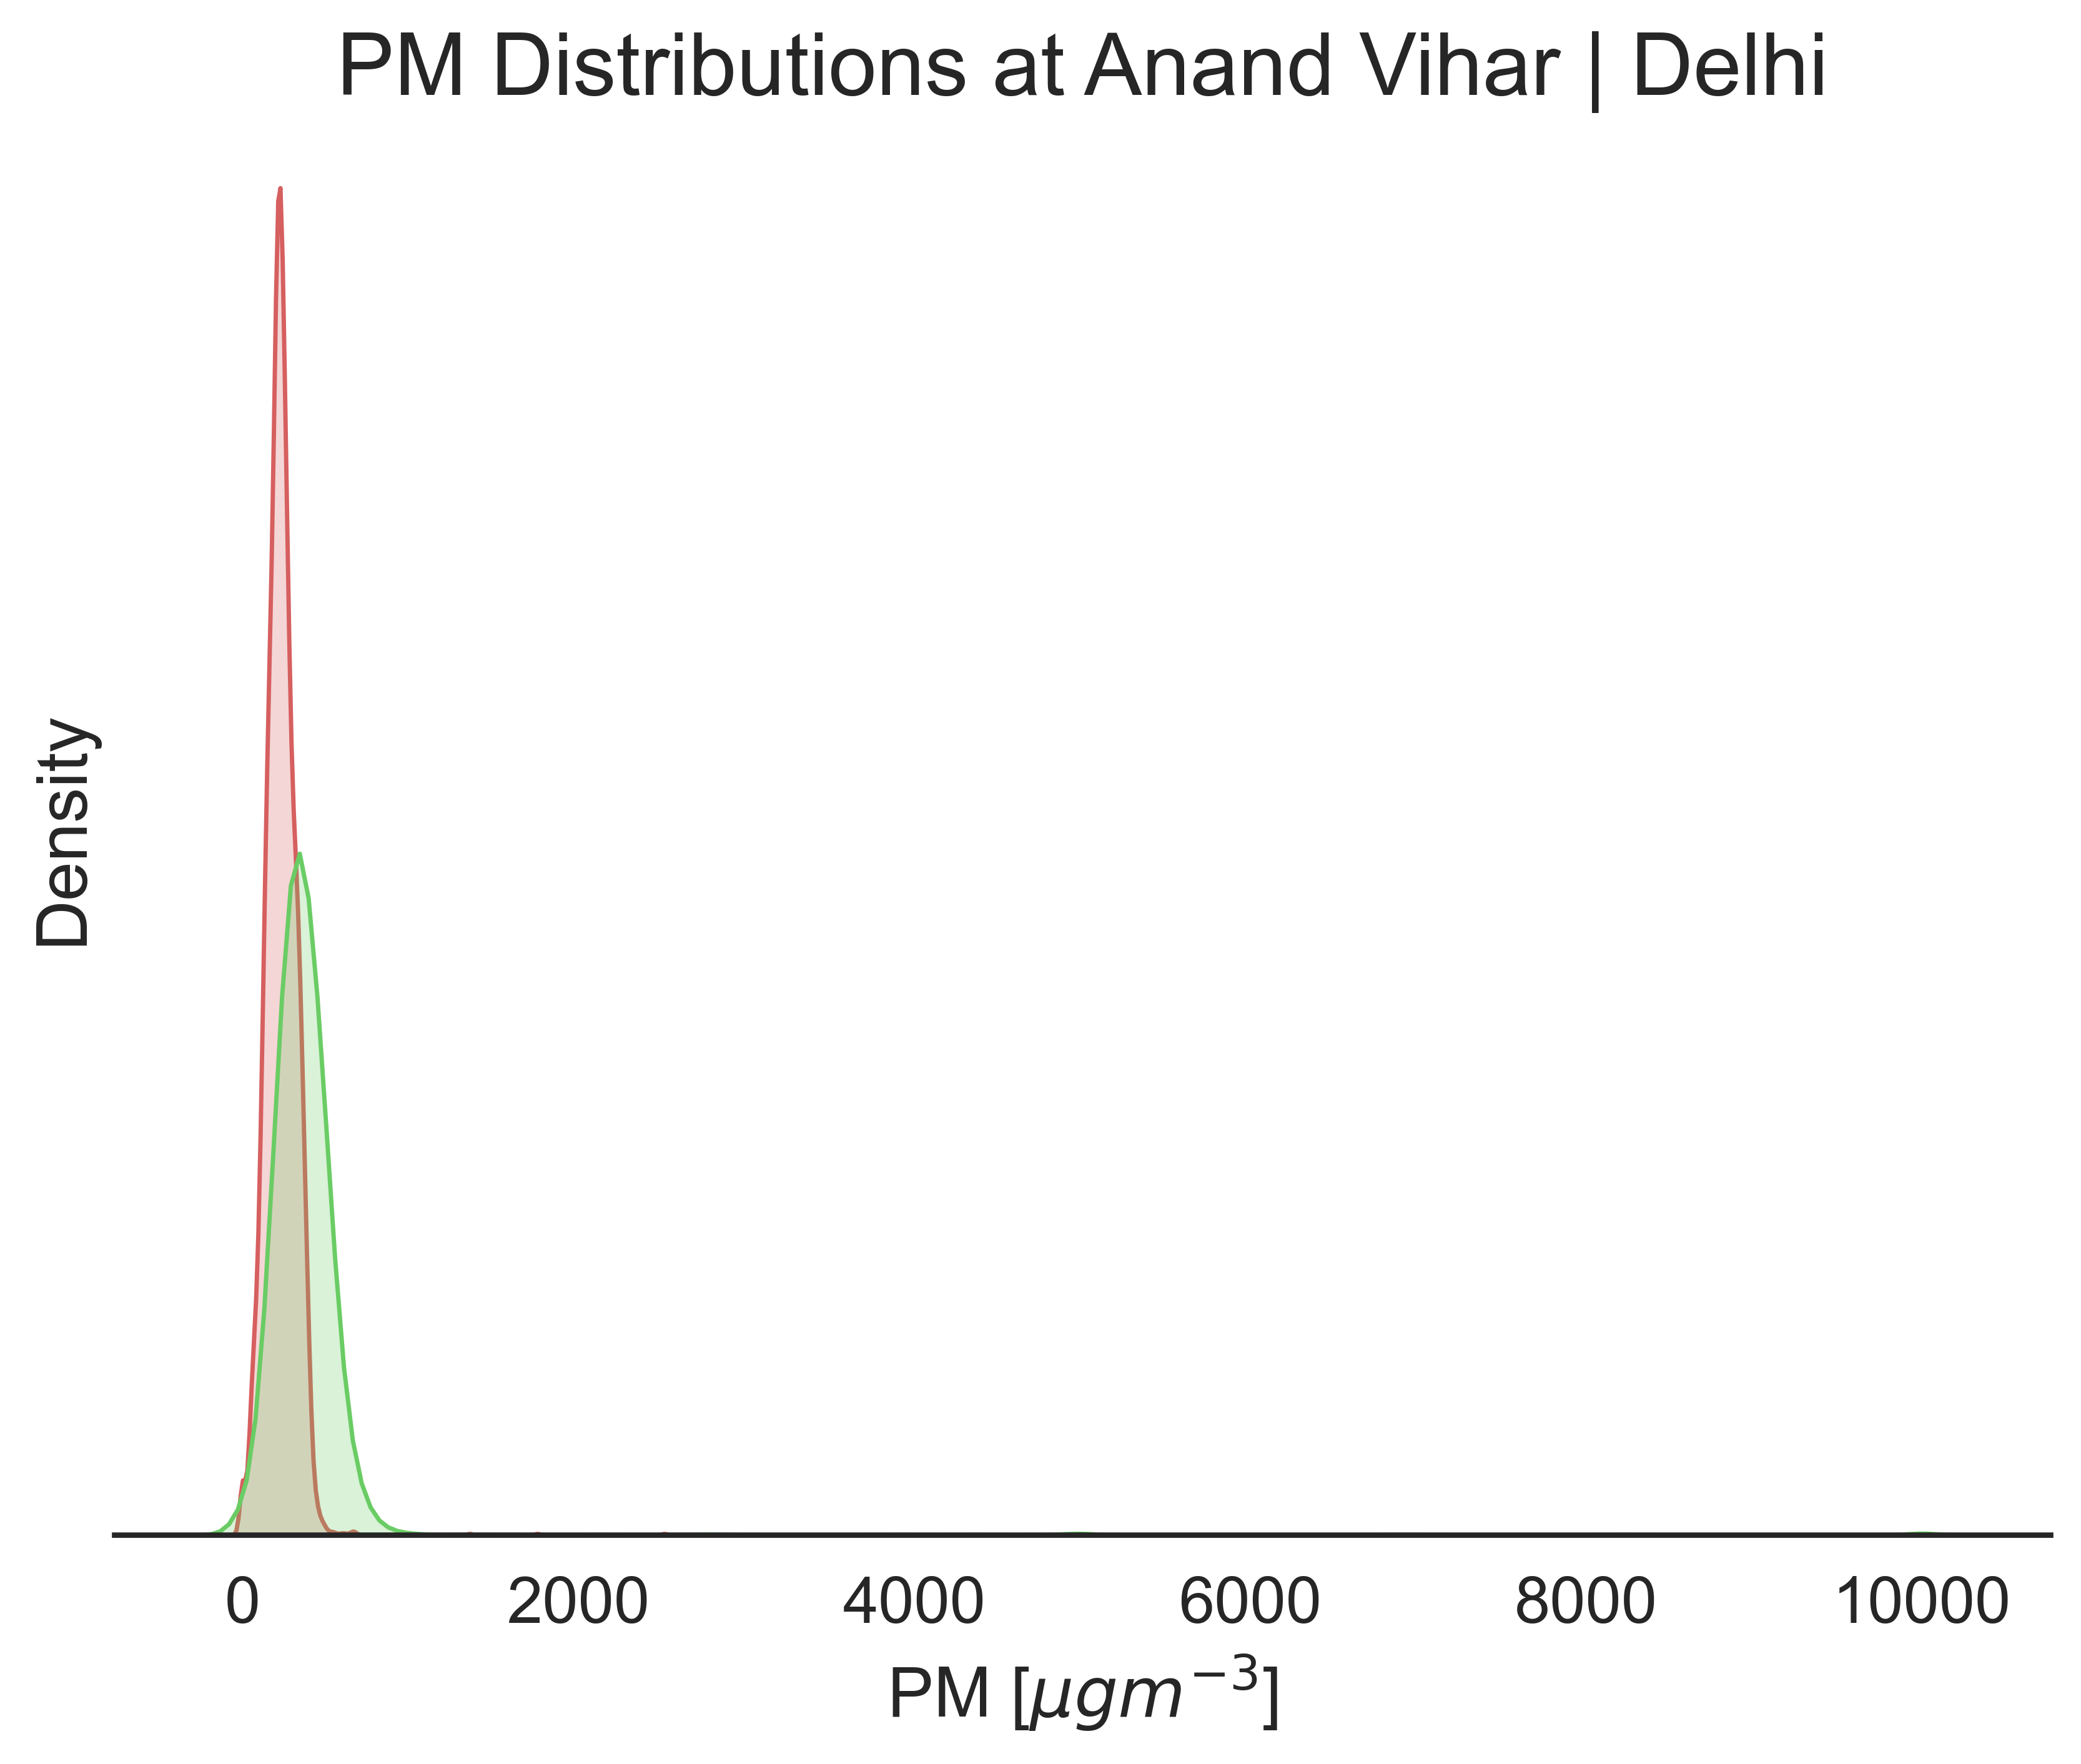

In [21]:
sns.set(style="white", palette='muted', font_scale=1.35, color_codes=True)

# grab the data
res = api.measurements(city='Delhi', loc='Anand Vihar', parameter=['pm25', 'pm10'],
            limit=10000, df=True)

# clean up the data by removing values below 0
res = res.query("value >= 0.0")

# seperate the data into pm25 and pm10 dataframes
pm25 = res.query("parameter == 'pm25'")
pm10 = res.query("parameter == 'pm10'")

# set up the axis
fig, ax = plt.subplots(1, figsize=(8, 6))

# plot the pm25 and pm10 distributions
ax = sns.distplot(pm25['value'].values, color='r', hist=False, kde_kws={'shade': True}, label='$PM_{2.5}$', ax=ax)
ax = sns.distplot(pm10['value'].values, color='g', hist=False, kde_kws={'shade': True}, label='$PM_{10}$', ax=ax)

# Set the labels
ax.set_xlabel("PM [$\mu g m^{-3}$]", fontsize=16)
ax.set_title("PM Distributions at Anand Vihar | Delhi", fontsize=20)

# despine the plot
sns.despine(left=True)

# Remove the yticks
ax.set(yticks=[])

## Compare All Pollutants at Anand Vihar in Delhi

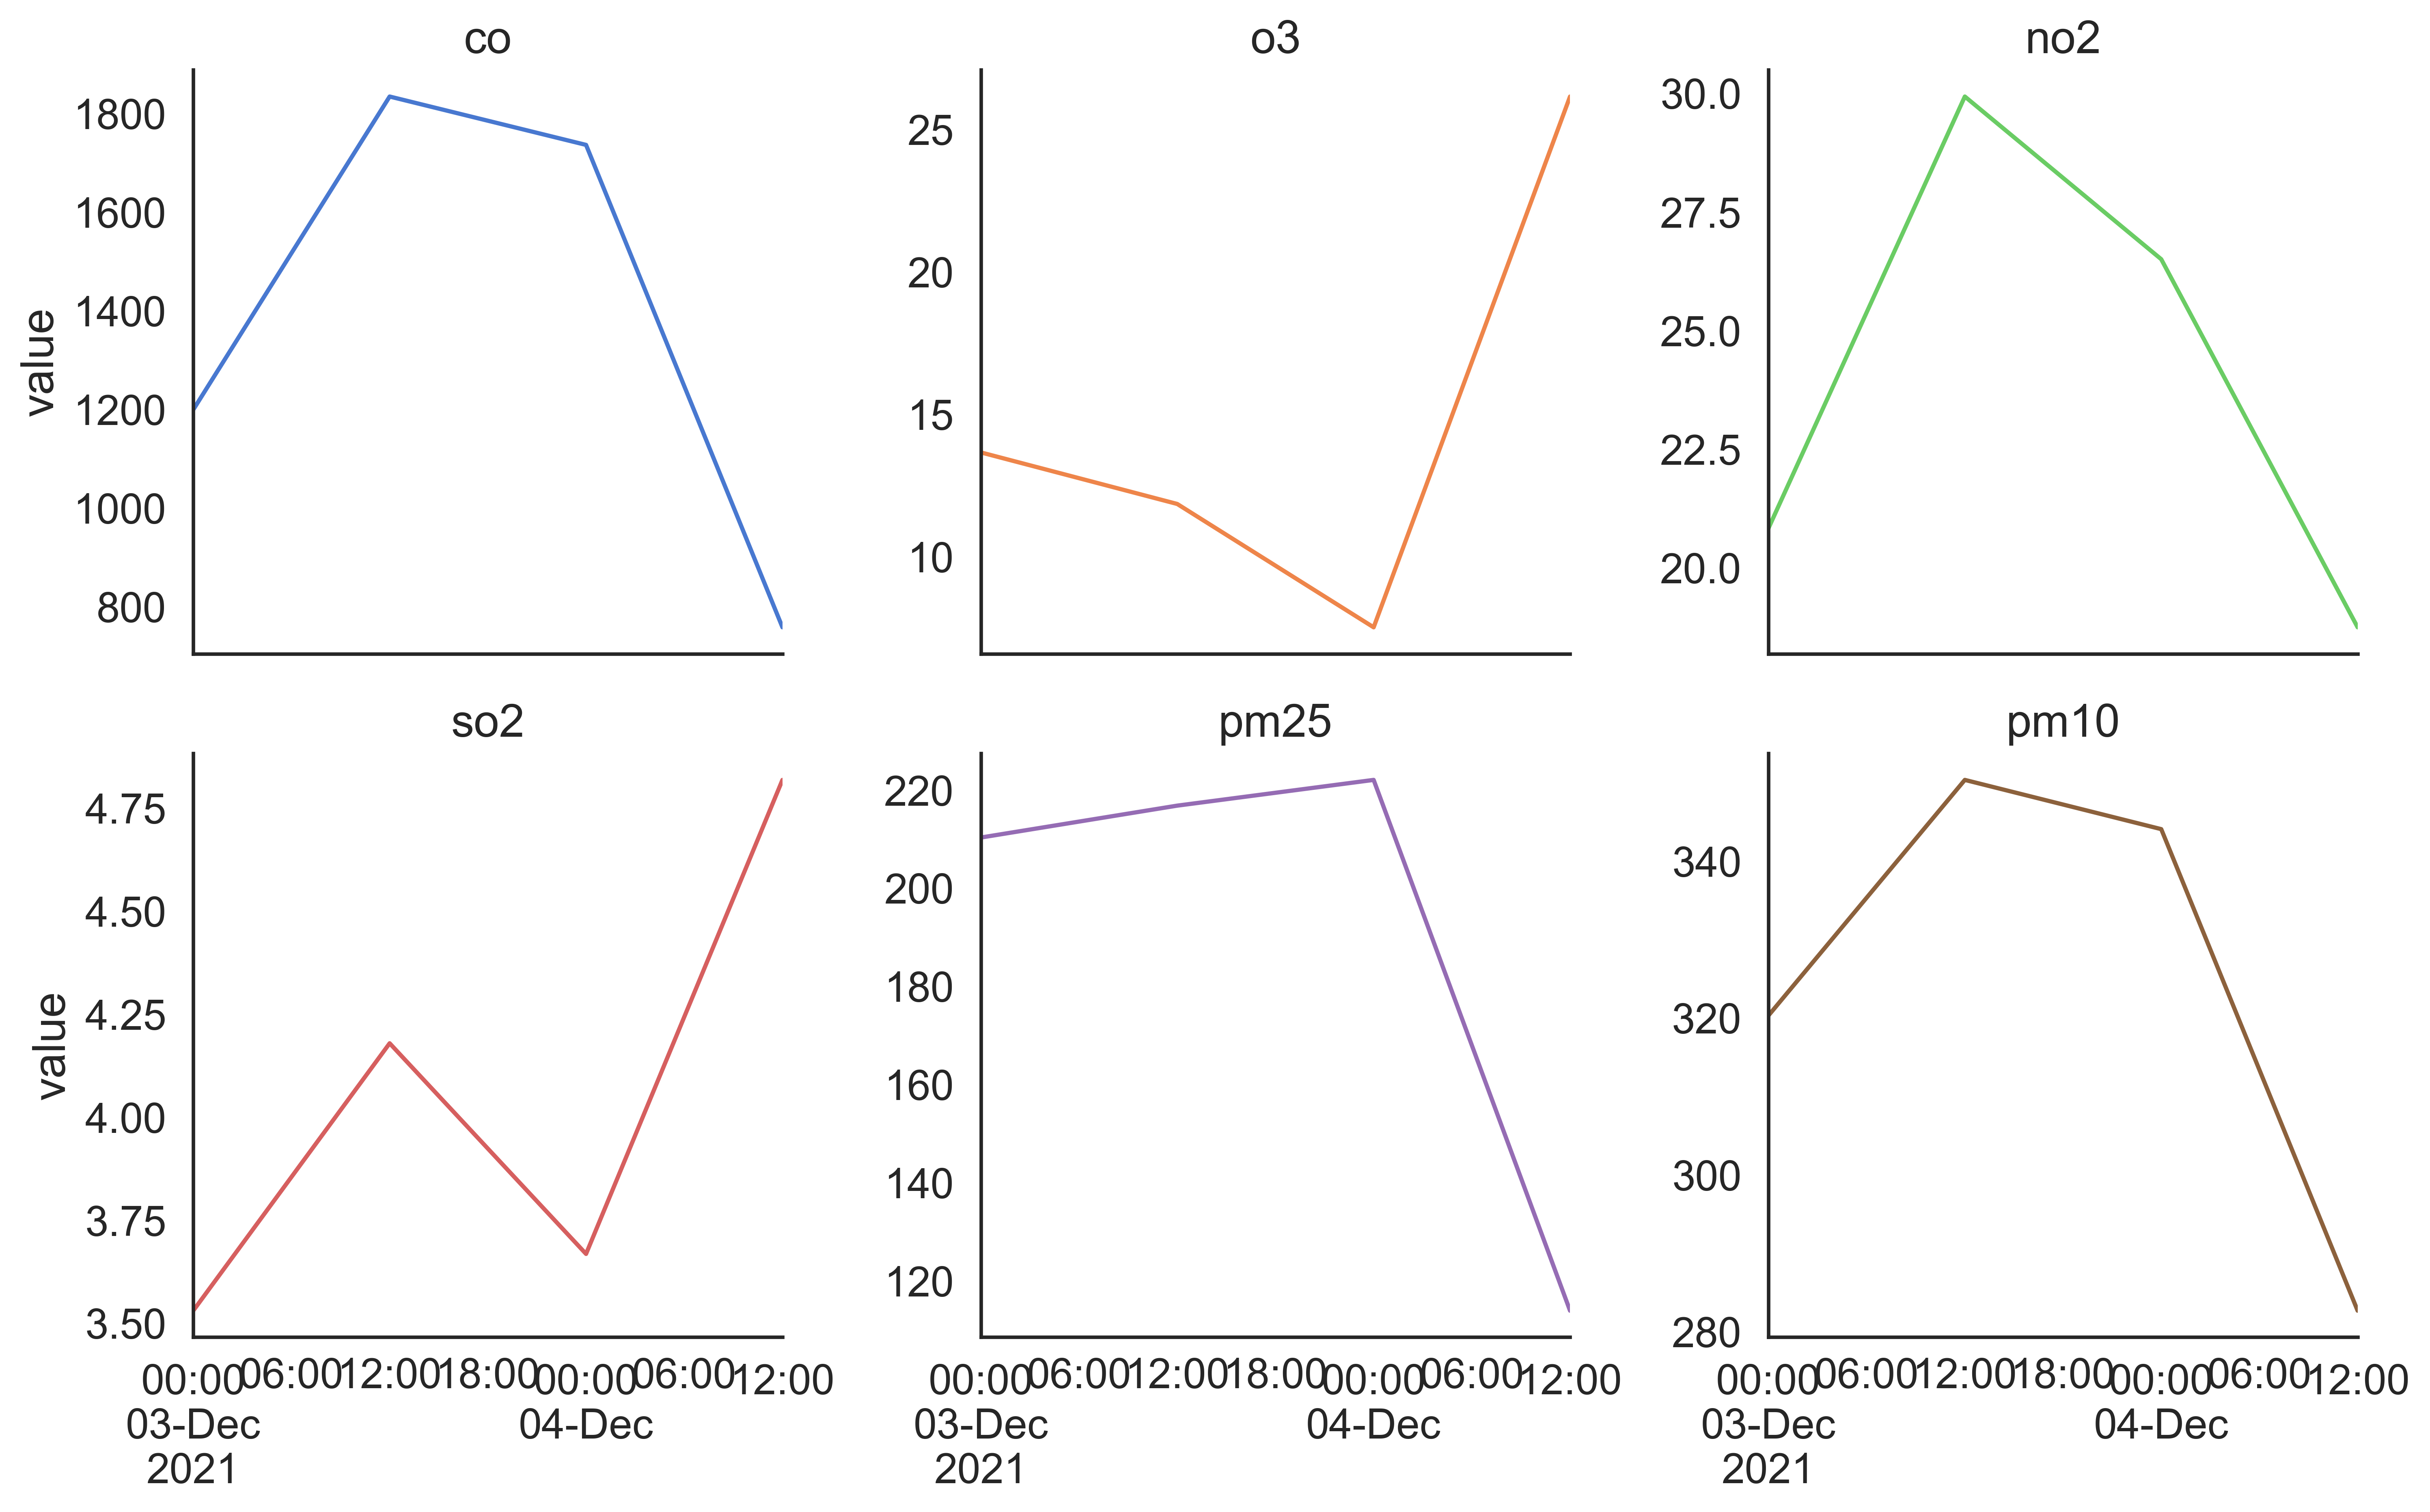

In [22]:
sns.set(style="white", palette='muted', font_scale=1.35, color_codes=True)

# grab the data
df = api.measurements(city='Delhi', loc='Anand Vihar', limit=10000, df=True)

# clean up the data by removing values below 0
df = df.query("value >= 0.0")

# Map the gas species from ugm3 to ppb (gas-phase species only)
df['corrected'] = df.apply(lambda x: openaq.utils.mass_to_mix(x['value'], x['parameter'], unit='ppb'), axis=1)

# Build a custom plot function to make nice datetime plots
def dateplot(y, **kwargs):
    ax = plt.gca()

    data = kwargs.pop("data")
    rs = kwargs.pop("rs", '12h')

    data.resample(rs).mean().plot(y=y, ax=ax, grid=False, **kwargs)

# Set up a FacetGrid
g = sns.FacetGrid(df, col='parameter', col_wrap=3, size=4, hue='parameter', sharey=False)

# Map the dataframe to the grid
g.map_dataframe(dateplot, "corrected", rs='12h')

# Set the titles
g.set_titles("{col_name}", fontsize=16)

# Set the axis labels
g.set_axis_labels("", "value")